1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [15]:
#author Federico Pilotto 2107076
#imports cell
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import timeit


In [16]:
m = np.arange(12).reshape((3,4))
print(m)
print('Mean: ', np.mean(m))

mean_row = []
mean_col = []
for i in range(3):
    mean_row.append(np.mean(m[i,:]))

for i in range(4):
    mean_col.append(np.mean(m[:, i]))

print('Mean rows: ', mean_row)
print('Mean columns: ', mean_col)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Mean:  5.5
Mean rows:  [1.5, 5.5, 9.5]
Mean columns:  [4.0, 5.0, 6.0, 7.0]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [17]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
result_fun = np.outer(u,v)
print('Outer product with function: \n', result_fun)

result_list = [i*j for i in u for j in v]
print('Outer product with list comprehension:\n ', result_list)

result_bro = u[:, None]*v[None, :]
print('Outer product with broadcasting:\n ', result_bro)


Outer product with function: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer product with list comprehension:
  [2, 4, 6, 8, 6, 12, 18, 24, 10, 20, 30, 40, 14, 28, 42, 56]
Outer product with broadcasting:
  [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [18]:

m = npr.rand(10,6)*3
print('Ranom matrix\n', m)
print('')

mask = (m < 0.3)
m[mask] = 0
print('Random matrix after the mask\n', m)

Ranom matrix
 [[1.62869192 0.0764703  1.31653264 0.71684154 0.05256039 1.95139376]
 [1.53882117 0.80699208 2.50837191 1.48189717 1.98732395 2.409443  ]
 [1.18833113 2.01035988 1.72272673 2.0768462  2.86520387 0.86897709]
 [1.66752991 1.56788037 0.78329494 2.42632106 0.00430821 1.13747904]
 [2.3574736  1.19441114 1.69379121 2.28211605 2.69050855 0.82116326]
 [1.6838933  0.8880268  2.65480601 2.18259501 1.98045122 2.35571467]
 [0.15514487 1.67612382 2.38751    0.09089244 1.14116425 0.71035453]
 [1.10248025 0.9085625  2.37973111 2.93318613 2.44057413 0.0195337 ]
 [2.66350441 1.26858986 1.24533615 1.65772667 2.38069239 2.42883167]
 [0.22556623 2.73956581 2.46218133 2.8291474  2.07954689 2.78713279]]

Random matrix after the mask
 [[1.62869192 0.         1.31653264 0.71684154 0.         1.95139376]
 [1.53882117 0.80699208 2.50837191 1.48189717 1.98732395 2.409443  ]
 [1.18833113 2.01035988 1.72272673 2.0768462  2.86520387 0.86897709]
 [1.66752991 1.56788037 0.78329494 2.42632106 0.         

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

In [19]:
#First point
m = np.linspace(0, 2*np.pi, 100)
print(m)
print('')
m_10th = m[0:100:10]
print('Sliced matrix\n', m_10th)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

In [20]:
#Second Point
reversed_m = m[::-1]
print('Reversed matrix\n', reversed_m)

Reversed matrix
 [6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.26933037 1.20586385 1.14239733 1.07893081 1.01546429
 0.95199777 0.88853126 0.82506474 0.76159822 0.

[0.76159822 0.82506474 3.87145761 3.93492413]


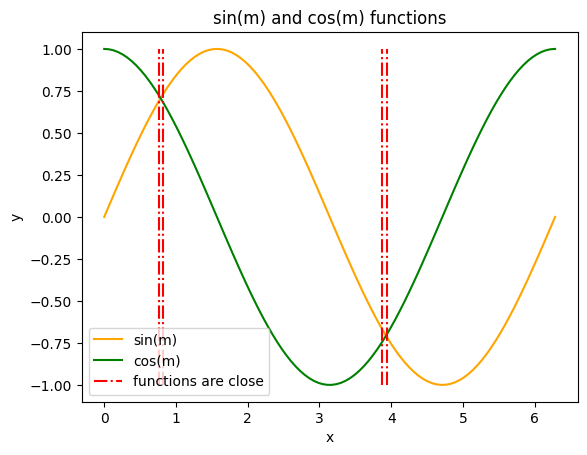

In [21]:
#Third and Fourth point
mask = (np.abs(np.sin(m) - np.cos(m)) < 0.1)
new_m = m[mask]
print(new_m)

#add title and label to the plot
plt.figure()
plt.title('sin(m) and cos(m) functions')
plt.xlabel('x')
plt.ylabel('y')

#plot
plt.plot(m, np.sin(m), color = 'orange', label='sin(m)')
plt.plot(m, np.cos(m), color = 'g', label='cos(m)')
plt.vlines(new_m, ymin=-1, ymax=1, colors='red', linestyles='dashdot', label='functions are close')

#add the legend
plt.legend()

plt.show()





5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [22]:
m_10 = np.array([i*j for i in range(1,11) for j in range(1, 11)]).reshape(10,10)
print('10x10 moltiplication table matrix\n', m_10, '\n')
diag = np.diag(m_10)
print('Trace of the 10x10 matrix: ', sum(diag),'\n')

antidiag = np.fliplr(m_10).diagonal()
print('Anti-diagonal matrix: ', antidiag, '\n')

diag2 = np.diag(m_10[1:,:9])
print('Diagonal by 1 upwards: ', diag2)

10x10 moltiplication table matrix
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

Trace of the 10x10 matrix:  385 

Anti-diagonal matrix:  [10 18 24 28 30 30 28 24 18 10] 

Diagonal by 1 upwards:  [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [23]:
#cities = np.array(['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles'])
miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

dist = np.abs(miles[:, None] - miles[None, :])
print('Distances matrix in miles\n', dist, '\n')

#1 miles = 1.609 kilometers
print('Distances matrix in kilometers\n', dist*1.6)

Distances matrix in miles
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

Distances matrix in kilometers
 [[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  702.4  486.4    0. 

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [24]:
def is_prime(num):
    if num == 0:
        return False
    
    for i in range(2, num):
        if num%i == 0:
            return False
    return True

#function which implements the definition of prime numbers
def primes(N):
    primes = []
    for i in range(N+1):
        if is_prime(i):
            primes.append(i)
    return primes

def sieve_eratosthenes(N):
    m = np.ones(N, dtype=bool)
    nums = np.arange(N)

    for i in range(2, int(np.sqrt(N) + 1)):
        if m[i]:
            m[i**2::i] = False

    #extract prime numbers from nums
    prime = nums[m]
    return prime


In [25]:
prime_nums = primes(99)
print('First 99 prime numbers: ', prime_nums)

#time for one execution with N = 99
print('Time for N = 99 with primes function: ', timeit.timeit(lambda: primes(99), number=1))
print('Time for N = 99 with eratosthenes function: ', timeit.timeit(lambda: sieve_eratosthenes(99), number=1), '\n')

#time for one execution with N = 999
print('Time for N = 999 with primes function: ', timeit.timeit(lambda: primes(999), number=1))
print('Time for N = 999 with eratosthenes function: ', timeit.timeit(lambda: sieve_eratosthenes(999), number=1), '\n')

#time for one execution with N = 9999
print('Time for N = 9999 with primes function: ', timeit.timeit(lambda: primes(9999), number=1))
print('Time for N = 9999 with eratosthenes function: ', timeit.timeit(lambda: sieve_eratosthenes(9999), number=1))

#The Eratosthenes algorithm is 10^5 faster of the simple prime function with large list of prime to check,
#as we can see in the last case with N = 9999



First 99 prime numbers:  [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Time for N = 99 with primes function:  3.56250093318522e-05
Time for N = 99 with eratosthenes function:  5.500001134350896e-05 

Time for N = 999 with primes function:  0.0021890839852858335
Time for N = 999 with eratosthenes function:  0.0003620839852374047 

Time for N = 9999 with primes function:  0.20556337499874644
Time for N = 9999 with eratosthenes function:  0.00021391702466644347


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

[[  1   4   1 ... 144 169 144]
 [  1   0   1 ... 256 289 256]
 [  1   4   1 ...   0   1   0]
 ...
 [  1   4   9 ...  36  49  64]
 [  1   4   1 ...  36  25  36]
 [  1   4   1 ... 144 121 144]] 



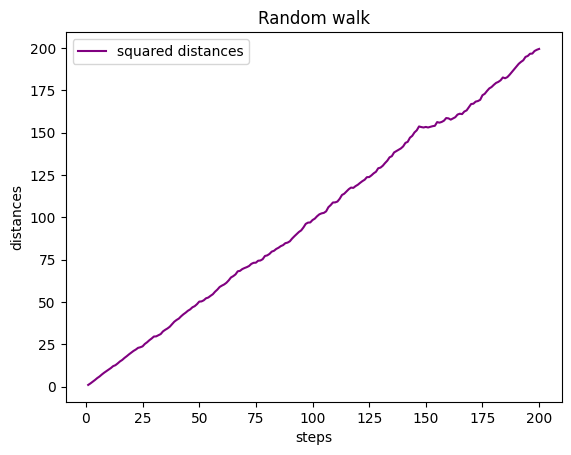

In [26]:
walkers = 1000
steps = 200

#creating 2D grid of walkers x steps
grid = a = npr.randint(-1, 1, walkers*steps).reshape(walkers, steps)
grid[(grid == 0)] = 1

squared_sum = np.cumsum(grid, axis=1)**2
print(squared_sum, '\n')
mean = np.mean(squared_sum, axis=0)
#print(mean)
time = np.arange(1, steps + 1)

#add title and label to the plot
plt.figure()
plt.title('Random walk')
plt.xlabel('steps')
plt.ylabel('distances')

#plot
plt.plot(time, mean, color = 'purple', label='squared distances')
plt.legend()
plt.show()